# Обучение с учителем: качество модели

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Цель исследования

Провести анализ данных от заказчика, и разработать решение, которое позволит персонализировать предложения постоянным клиентам.

### Исходные данные

Данные из таблицы [market_file.csv](https://code.s3.yandex.net/datasets/market_file.csv):

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.\

•	`id` — номер покупателя в корпоративной базе данных.\
•	`Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».\
•	`Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».\
•	`Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.\
•	`Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.\
•	`Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.\
•	`Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.\
•	`Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.\
•	`Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.\
•	`Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.\
•	`Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.\
•	`Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.\
•	`Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


Данные из таблицы [market_money.csv](https://code.s3.yandex.net/datasets/market_money.csv):

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. \
•	`id` — номер покупателя в корпоративной базе данных.\
•	`Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.\
•	`Выручка` — сумма выручки за период.


Данные из таблицы [market_time.csv](https://code.s3.yandex.net/datasets/market_time.csv):

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.\
•	`id` — номер покупателя в корпоративной базе данных.\
•	`Период` — название периода, во время которого зафиксировано общее время.\
•	`минут` — значение времени, проведённого на сайте, в минутах.


Данные из таблицы [money.csv](https://code.s3.yandex.net/datasets/money.csv):

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.\
•	`id` — номер покупателя в корпоративной базе данных.\
•	`Прибыль` — значение прибыли.


Группы признаков в виде диаграммы Исикавы:

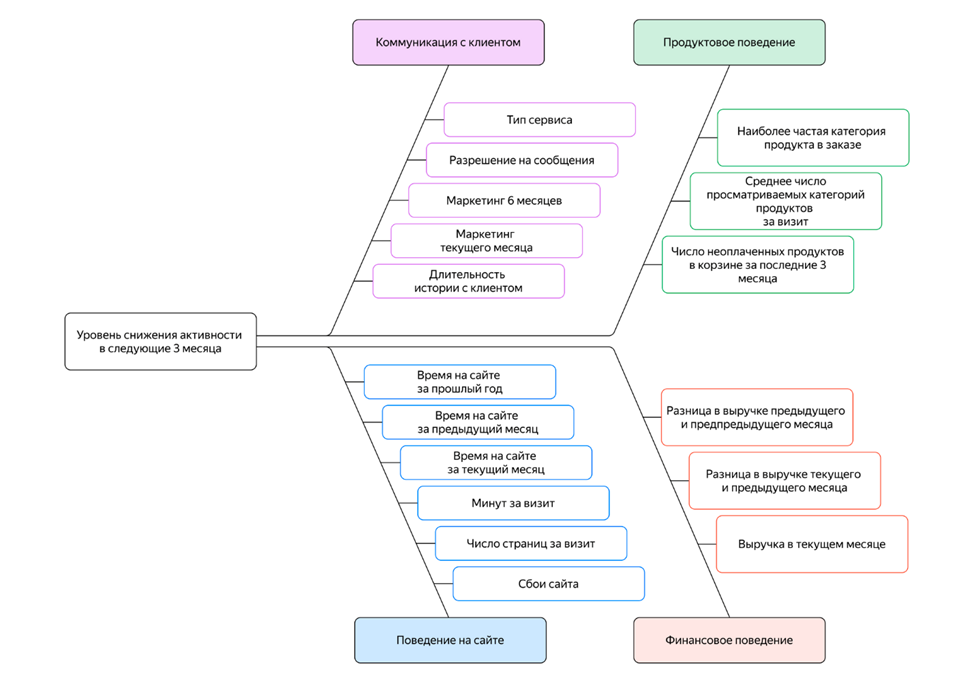

## Загрузка данных

### Загрузка библиотек

In [1]:
!pip install phik -q

In [2]:
!pip install optuna -q
!pip install optuna-integration -q

In [3]:
!pip install shap -q

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import phik
import shap

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:0.3f}'.format)

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [5]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
Note: you may need to restart the kernel to use updated packages.


### Загрузка файлов

In [6]:
data_market_file = pd.read_csv('/datasets/market_file.csv')
data_market_money = pd.read_csv('/datasets/market_money.csv')
data_market_time = pd.read_csv('/datasets/market_time.csv')
data_money = pd.read_csv('/datasets/money.csv', sep=';')

In [7]:
data_market_file.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0               3.400                     5           121              0.000   
1               4.400                     4           819              0.750   
2               4.900                     3           539              0.140   
3               3.200                     5           896              0.990   
4               5.100                     3          1064              0.940   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

На первый взгляд, данные соотвествуют описанию от заказчика. Все столбцы на своих местах.

In [8]:
data_market_money.head()

id               Период  Выручка
0  215348  препредыдущий_месяц    0.000
1  215348        текущий_месяц 3293.100
2  215348     предыдущий_месяц    0.000
3  215349  препредыдущий_месяц 4472.000
4  215349        текущий_месяц 4971.600

Все признаки на месте.

In [9]:
data_market_time.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

Аналогичная ситуация.

In [10]:
data_money.head(5)

id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21

И тут тоже никаких явных проблем. За исключением того, что тут придется использовать разделитель ';' для корректной дальнейшей работы.

### Промежуточный вывод

Пока каких-то сильных проблем в данных не наблюдается, загрузка данных прошла успешно, никакие столбцы не потерялись. Проблемы в самих данных будут выявлены в процессе предобработки.

## Предобработка данных

На данном шаге детально исследуем каждый датасет и устраним очевидные (и не очень) проблемы в данных.

### market_file

In [11]:
data_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Ого, даже пропусков нет! А также типы данных соответствуют задуманным. Но радоваться рано - возможно, в самих столбцах есть какие-то проблемы.

Для красоты данных и соответствия стандартам приведем названия столбцов к snake_case.

In [12]:
data_market_file.columns = [col.lower() for col in data_market_file.columns]
data_market_file.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0               3.400                     5           121              0.000   
1               4.400                     4           819              0.750   
2               4.900                     3           539              0.140   
3               3.200                     5           896              0.990   
4               5.100                     3          1064              0.940   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [13]:
data_market_file['тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

А вот и первая несостыковка. Исправим ее:

In [14]:
data_market_file['тип сервиса'] = data_market_file['тип сервиса'].str.replace('стандартт', 'стандарт')
data_market_file['тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Проверим, есть ли в данных полные дубликаты:

In [15]:
data_market_file[data_market_file.duplicated() == True]

Empty DataFrame
Columns: [id, покупательская активность, тип сервиса, разрешить сообщать, маркет_актив_6_мес, маркет_актив_тек_мес, длительность, акционные_покупки, популярная_категория, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, ошибка_сервиса, страниц_за_визит]
Index: []

Удивительно, но даже полные дубликаты отсутствуют. \
Теперь стоит проверить, есть ли где-то дублирующиеся `id`. 

In [16]:
data_market_file[data_market_file['id'].duplicated() == True]

Empty DataFrame
Columns: [id, покупательская активность, тип сервиса, разрешить сообщать, маркет_актив_6_мес, маркет_актив_тек_мес, длительность, акционные_покупки, популярная_категория, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, ошибка_сервиса, страниц_за_визит]
Index: []

Какой хороший датасет! Даже `id` не дублируются. Сравнивать другие столбцы не имеет особого смысла - даже если в них данные дублируются, то, вероятно, они реально одинаковые. 

### market_money

In [17]:
data_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


И снова пропусков не наблюдается. 

In [18]:
data_market_money.columns = [col.lower() for col in data_market_money.columns]

In [19]:
data_market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Интересная формулировка - "препредыдущий". Но, судя по описанию, все нормально - в датасете с описанием пользователей 1300 записей, в этом - ровно в три раза больше, как раз за все три месяца - текущий, предыдущий и препредыдущий.

### market_time

In [20]:
data_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Записей ровно в два раза больше, чем в первом датасете - за текущий и за предыдущий месяц для каждого пользователя. 

In [21]:
data_market_time.columns = [col.lower() for col in data_market_time.columns]

In [22]:
data_market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [23]:
data_market_time['период'] = data_market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')
data_market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

### money

In [24]:
data_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


Наблюдений ровно столько же, сколько и пользователей - не больше, не меньше. Но почему-то прибыль является `object`, хотя, по идее, должна быть ну как минимум `float`, а лучше даже `int`. Взглянем на этот столбец внимательнее:

In [25]:
data_money.head(5)

id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21

Вероятнее всего, прибыль указана в тысячах. Благодаря заказчику мы знаем, что этот столбец не понадобится в дальнейшем моделировании, но сделать его более опрятным не помешает.

In [26]:
data_money.columns = [col.lower() for col in data_money.columns]

In [27]:
data_money['прибыль'] = data_money['прибыль'].str.replace(',', '.').astype(float) * 1000

data_money.head()

id  прибыль
0  215348  980.000
1  215349 4160.000
2  215350 3130.000
3  215351 4870.000
4  215352 4210.000

Мелочь, а приятно.

### Промежуточный вывод

В целом, данные во всех датасетах собраны неплохо. Пропусков в данных нет, полных дубликатов тоже не наблюдается. Типы данных в столбцах соответствуют своему описанию почти везде. Встретились несколько незначительных ошибок, таких как дублирующиеся буквы или неправильная буква в описании. Все подобные проблемы устранены, данные приведены к соответствующему виду.

## Исследовательский анализ данных

В описании проекта от Яндекса просят следующее:

`Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.`

Сначала исследуем все признаки, а после выполним вторую часть с отбором клиентов.

### EDA датасета data_market_file

Для начала еще раз взглянем на датасет:

In [28]:
data_market_file.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0               3.400                     5           121              0.000   
1               4.400                     4           819              0.750   
2               4.900                     3           539              0.140   
3               3.200                     5           896              0.990   
4               5.100                     3          1064              0.940   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

#### Покупательская активность

In [29]:
data_market_file['покупательская активность'].describe()

count                1300
unique                  2
top       Прежний уровень
freq                  802
Name: покупательская активность, dtype: object

In [30]:
data_market_file['покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          498
Name: покупательская активность, dtype: int64

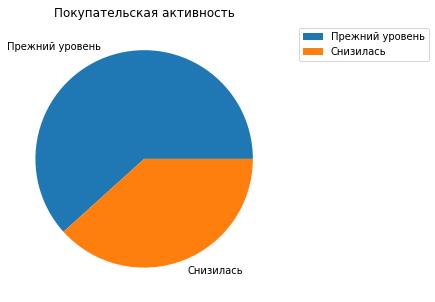

In [31]:
data_market_file_purchasing_activity_plot = (data_market_file['покупательская активность'].value_counts().
                                             plot(kind='pie', figsize=(10, 5), subplots=True))

plt.title('Покупательская активность')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

У 2/3 клиентов покупательская активность осталась на том же уровне, что и была, а у остальных упала.

#### Тип сервиса

In [32]:
data_market_file['тип сервиса'].describe()

count         1300
unique           2
top       стандарт
freq           924
Name: тип сервиса, dtype: object

In [33]:
data_market_file['тип сервиса'].value_counts()

стандарт    924
премиум     376
Name: тип сервиса, dtype: int64

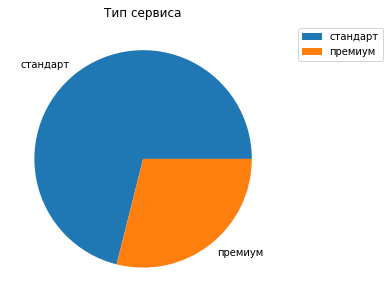

In [34]:
data_market_file_service_type_plot = (data_market_file['тип сервиса'].value_counts().
                                             plot(kind='pie', figsize=(10, 5), subplots=True))

plt.title('Тип сервиса')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

Четверть клиентов использует премиум.

#### Разрешить сообщать

In [35]:
data_market_file['разрешить сообщать'].describe()

count     1300
unique       2
top         да
freq       962
Name: разрешить сообщать, dtype: object

In [36]:
data_market_file['разрешить сообщать'].value_counts()

да     962
нет    338
Name: разрешить сообщать, dtype: int64

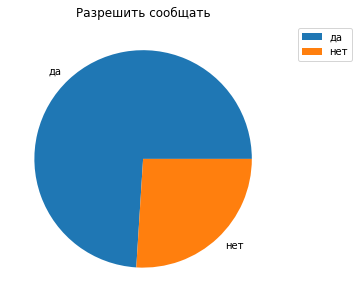

In [37]:
data_market_file_allow_reporting_plot = (data_market_file['разрешить сообщать'].value_counts().
                                             plot(kind='pie', figsize=(10, 5), subplots=True))

plt.title('Разрешить сообщать')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

Большинство (более трех четвертей) клиентов не против, чтобы им сообщали о новых предложениях.

#### Активность за последние 6 месяцев

In [38]:
data_market_file['маркет_актив_6_мес'].describe()

count   1300.000
mean       4.254
std        1.015
min        0.900
25%        3.700
50%        4.200
75%        4.900
max        6.600
Name: маркет_актив_6_мес, dtype: float64

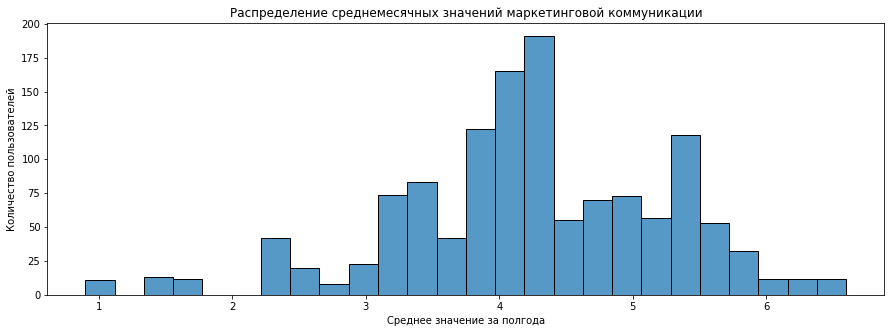

In [39]:
plt.figure(figsize=(15, 5))
sns.histplot(x='маркет_актив_6_мес', data=data_market_file, palette='viridis')
    
plt.title('Распределение среднемесячных значений маркетинговой коммуникации')
plt.xlabel('Среднее значение за полгода')
plt.ylabel('Количество пользователей')
    
plt.show()

 Самое частое значение этого признака - 4.1. В то же время, есть клиенты со средним значением меньше единицы - значит с ними связывались даже реже, чем раз в месяц. Но также присутствует обратная ситуация - максимальное значение признака 6.6. С таким клиентом компания взаимодействовала очень часто.
 
 Стоит так же отметить, что видны резкие подъемы относительно окрестностей на 2.4 и 5.5. Что это значит? Возможно, компания производила рассылку предложений, и именно эти пользователи в нее попали. 

#### Активность за текущий месяц

In [40]:
data_market_file['маркет_актив_тек_мес'].describe()

count   1300.000
mean       4.012
std        0.697
min        3.000
25%        4.000
50%        4.000
75%        4.000
max        5.000
Name: маркет_актив_тек_мес, dtype: float64

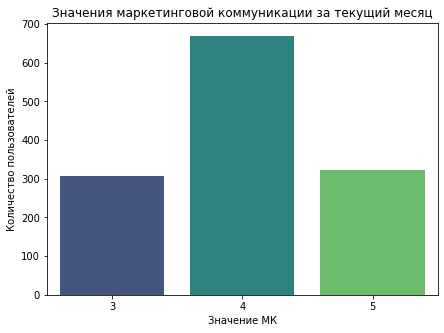

In [41]:

plt.figure(figsize=(7, 5))
sns.countplot(x='маркет_актив_тек_мес', data=data_market_file, palette='viridis')
    
plt.title('Значения маркетинговой коммуникации за текущий месяц')
plt.xlabel('Значение МК')
plt.ylabel('Количество пользователей')
    
plt.show()

Признак выглядит как кандидат на перевод в категориальные признаки - значений достаточно мало и они четко разделены.

Самое распространенное (более половины наблюдений) значение - 4 раза. В целом, это подтверждает исследование из предыдщуего пункта, где среднее значение было около 4.2. С клиентами действительно связываются около 4-х раз в месяц. 

In [42]:
data_market_file['маркет_актив_тек_мес'] = np.select(
    [data_market_file['маркет_актив_тек_мес'] <= 3, 
     (data_market_file['маркет_актив_тек_мес'] > 3) & (data_market_file['маркет_актив_тек_мес'] < 5), 
     data_market_file['маркет_актив_тек_мес'] >= 5],
    ['низкий', 'средний', 'высокий'])

In [43]:
data_market_file['маркет_актив_тек_мес'].unique()

array(['высокий', 'средний', 'низкий'], dtype=object)

#### Длительность

In [44]:
data_market_file['длительность'].describe()

count   1300.000
mean     601.898
std      249.856
min      110.000
25%      405.500
50%      606.000
75%      806.000
max     1079.000
Name: длительность, dtype: float64

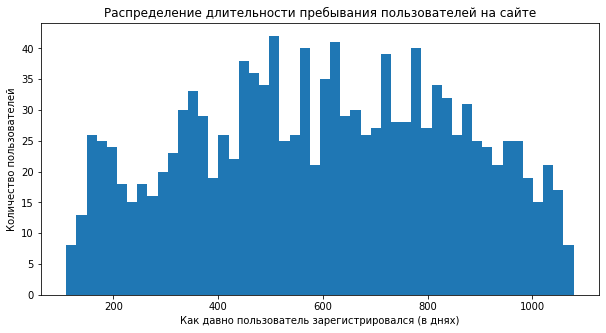

In [45]:
data_market_file_duration_plot = data_market_file['длительность'].plot(kind='hist', bins=50, figsize=(10, 5))

data_market_file_duration_plot.set_title('Распределение длительности пребывания пользователей на сайте')
data_market_file_duration_plot.set_xlabel('Как давно пользователь зарегистрировался (в днях)')
data_market_file_duration_plot.set_ylabel('Количество пользователей')

plt.show()

Большая часть клиентов уже давно знакома с нашим клиентов - в среднем около двух лет. Самый крайний пользователь зарегистрировался чуть меньше 4-х месяцев назад - скорее всего, с того момента датасет не обновлялся. А значит, что мы имеем дело с не самой актуальной информацией.

#### Акционные покупки

In [46]:
data_market_file['акционные_покупки'].describe()

count   1300.000
mean       0.320
std        0.250
min        0.000
25%        0.170
50%        0.240
75%        0.300
max        0.990
Name: акционные_покупки, dtype: float64

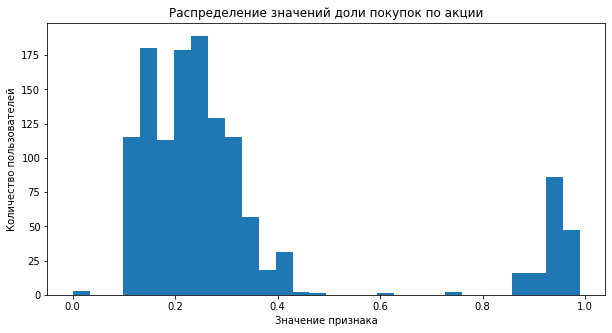

In [47]:
data_market_file_promotional_purchases_plot = data_market_file['акционные_покупки'].plot(kind='hist', bins=30, figsize=(10, 5))

data_market_file_promotional_purchases_plot.set_title('Распределение значений доли покупок по акции')
data_market_file_promotional_purchases_plot.set_xlabel('Значение признака')
data_market_file_promotional_purchases_plot.set_ylabel('Количество пользователей')

plt.show()

Есть самые настоящие "черрипикеры" - почти все товары покупают по акции. Это подтверждается описательными статистиками - максимальное значение признака - 0.99, или же 99%. 

Среднее же значение признака колеблется около 0.25, то есть в основном из всех покупок пользователей только четверть является акционными.

Этот признак также можно категоризировать - значения можно разделить на "низкая [доля]" и "высокая":

In [48]:
data_market_file['акционные_покупки'] = np.select(
    [(data_market_file['акционные_покупки'] <= 0.5), (data_market_file['акционные_покупки'] > 0.5)], 
    ['низкая', 'высокая'])

In [49]:
data_market_file['акционные_покупки'].unique()

array(['низкая', 'высокая'], dtype=object)

#### Популярные категории

In [50]:
data_market_file['популярная_категория'].describe()

count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: популярная_категория, dtype: object

In [51]:
data_market_file['популярная_категория'].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

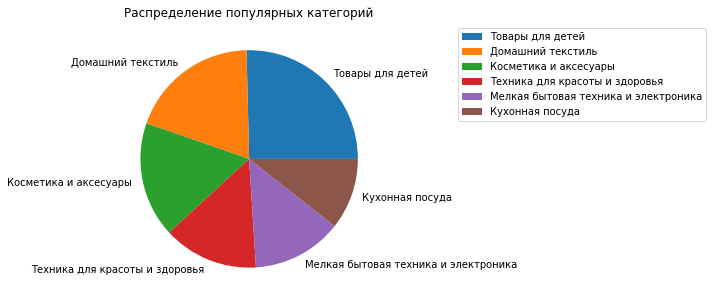

In [52]:
data_market_file_most_popular_plot = (data_market_file['популярная_категория']
                                      .value_counts()
                                      .plot(kind='pie', figsize=(10, 5)))

plt.title('Распределение популярных категорий')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.25 , 1), loc='upper left')

plt.show()

Самая популярная категория - детские товары, четверть всех наблюдений. За ним следует домашний текстиль, ну а остальные категории распределены примерно одинаково. Достаточно просто объяснить, почему товары для детей так популярны - интернет-магазины сильно упрощают жизнь, ведь не нужно тратить время на поиск подходящего товара, находясь вне дома - все делается "В один клик". Безусловно, это относится ко всем категориям, но с детскими товарами проявлется особенно явно.

#### Средний количества просмотренных категорий за визит

In [53]:
data_market_file['средний_просмотр_категорий_за_визит'].describe()

count   1300.000
mean       3.270
std        1.355
min        1.000
25%        2.000
50%        3.000
75%        4.000
max        6.000
Name: средний_просмотр_категорий_за_визит, dtype: float64

In [54]:
data_market_file['средний_просмотр_категорий_за_визит'].value_counts()

3    356
2    312
4    263
5    177
1    106
6     86
Name: средний_просмотр_категорий_за_визит, dtype: int64

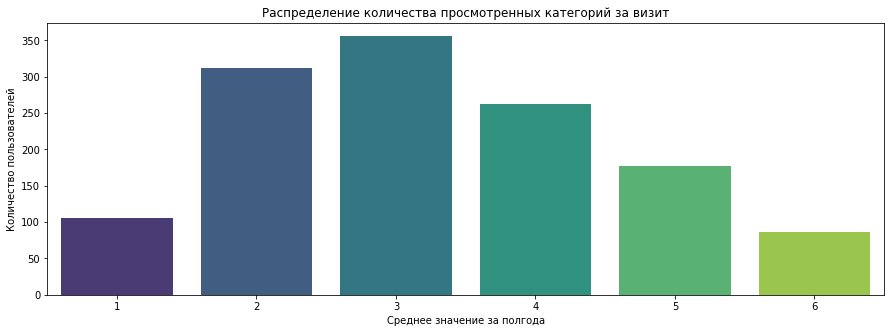

In [55]:
plt.figure(figsize=(15, 5))
sns.countplot(x='средний_просмотр_категорий_за_визит', data=data_market_file, palette='viridis')
    
plt.title('Распределение количества просмотренных категорий за визит')
plt.xlabel('Среднее значение за полгода')
plt.ylabel('Количество пользователей')
    
plt.show()

Больше всего пользователей с тремя категориями за визит. 

Схожее количество пользователей наблюдается также в столбцах с 6 категориями и с 1-й. Примерно одинаковое количество людей очень быстро выбирают нужный товар и подолгу сидят в поисках лучшего.

#### Количество неоплаченных продуктов в корзине за квартал

In [56]:
data_market_file['неоплаченные_продукты_штук_квартал'].describe()

count   1300.000
mean       2.840
std        1.971
min        0.000
25%        1.000
50%        3.000
75%        4.000
max       10.000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

In [57]:
data_market_file['неоплаченные_продукты_штук_квартал'].value_counts()

1     261
2     261
3     218
4     197
5     135
0     116
6      44
7      34
8      20
9      10
10      4
Name: неоплаченные_продукты_штук_квартал, dtype: int64

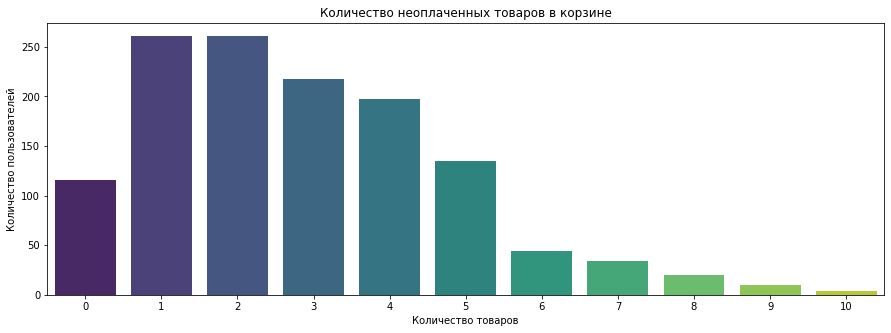

In [58]:
plt.figure(figsize=(15, 5))
sns.countplot(x='неоплаченные_продукты_штук_квартал', data=data_market_file, palette='viridis')
    
plt.title('Количество неоплаченных товаров в корзине')
plt.xlabel('Количество товаров')
plt.ylabel('Количество пользователей')
    
plt.show()

Количество людей с 1-м и 2-мя неоплаченными товарами одинаковое. В целом, никаких странностей в этом нет, почти у каждого человека есть что-нибудь в корзине, что купить очень хочется, а возможности пока нет :)

#### Количество ошибок сервиса

In [59]:
data_market_file['ошибка_сервиса'].describe()

count   1300.000
mean       4.185
std        1.955
min        0.000
25%        3.000
50%        4.000
75%        6.000
max        9.000
Name: ошибка_сервиса, dtype: float64

In [60]:
data_market_file['ошибка_сервиса'].value_counts()

4    257
3    226
5    208
2    189
6    156
7     92
1     74
8     66
0     17
9     15
Name: ошибка_сервиса, dtype: int64

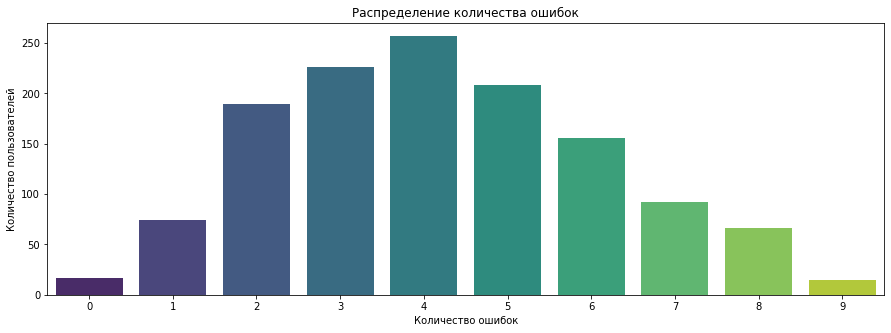

In [61]:
plt.figure(figsize=(15, 5))
sns.countplot(x='ошибка_сервиса', data=data_market_file, palette='viridis')
    
plt.title('Распределение количества ошибок')
plt.xlabel('Количество ошибок')
plt.ylabel('Количество пользователей')
    
plt.show()

Почти все клиенты сервиса так или иначе сталкивались с ошибками сервиса. Весомая часть клиентов столкнулась как минимум с тремя ошибками за время пользования сервисом. По мере увеличения количество ошибок, уменьшается количество людей, которые столкнулись с таким количеством ошибок.

#### Сколько страниц пользователь посетил за визит

In [62]:
data_market_file['страниц_за_визит'].describe()

count   1300.000
mean       8.177
std        3.978
min        1.000
25%        5.000
50%        8.000
75%       11.000
max       20.000
Name: страниц_за_визит, dtype: float64

In [63]:
data_market_file['страниц_за_визит'].value_counts()

6     127
5     115
4     112
8     109
9     108
10    104
7     102
11     92
3      76
12     73
13     61
2      58
14     53
15     36
16     21
1      20
17     19
18      7
19      5
20      2
Name: страниц_за_визит, dtype: int64

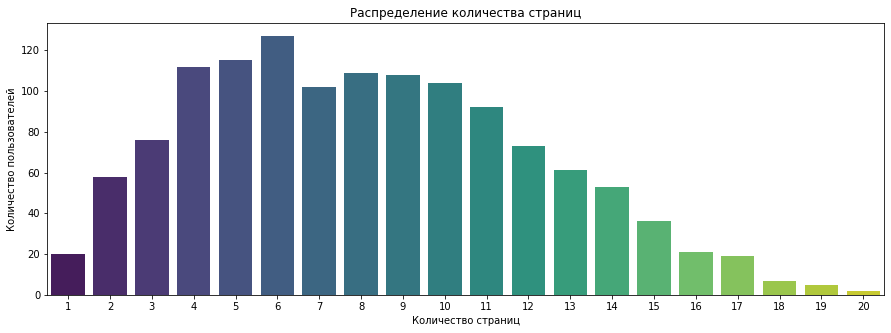

In [64]:
plt.figure(figsize=(15, 5))
sns.countplot(x='страниц_за_визит', data=data_market_file, palette='viridis')
    
plt.title('Распределение количества страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Количество пользователей')
    
plt.show()

В среднем, пользователи посещают около 6-8 страниц за визит. Каких-то особенных закономерностей в распределении количества посещенных страниц нет - 1 страницу посещает так же мало людей, сколько и 17 страниц.

### EDA датасета data_market_money

In [65]:
data_market_money.head()

id               период  выручка
0  215348  препредыдущий_месяц    0.000
1  215348        текущий_месяц 3293.100
2  215348     предыдущий_месяц    0.000
3  215349  препредыдущий_месяц 4472.000
4  215349        текущий_месяц 4971.600

#### Разделение периода на отдельные столбцы

In [66]:
data_market_money_pivot = data_market_money.pivot_table(index='id', columns='период', values='выручка', fill_value=0)

data_market_money_pivot.reset_index(inplace=True)

data_market_money_pivot.columns.name = None 
data_market_money_pivot.rename(columns={
    'текущий_месяц': 'выручка за текущий месяц',
    'предыдущий_месяц': 'выручка за предыдущий месяц',
    'препредыдущий_месяц': 'выручка за препредыдущий месяц'
}, inplace=True)

data_market_money = data_market_money_pivot

data_market_money.head()

id  выручка за предыдущий месяц  выручка за препредыдущий месяц  \
0  215348                        0.000                               0   
1  215349                     5216.000                            4472   
2  215350                     5457.500                            4826   
3  215351                     6158.000                            4793   
4  215352                     5807.500                            4594   

   выручка за текущий месяц  
0                  3293.100  
1                  4971.600  
2                  5058.400  
3                  6610.400  
4                  5872.500

Проанализируем выручку за каждый период.

#### Выручка за препредыдущий месяц

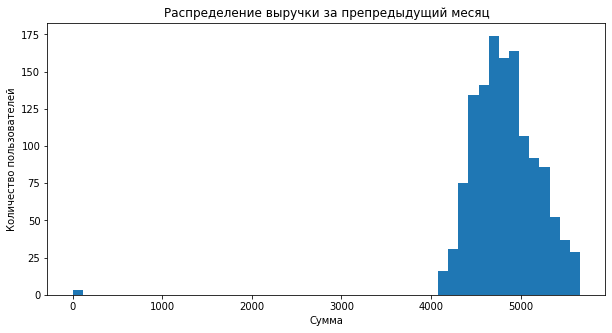

In [67]:
data_market_money_prepre_month_plot = data_market_money['выручка за препредыдущий месяц'].plot(kind='hist', 
                                                                                               bins=50,
                                                                                               figsize=(10, 5))

data_market_money_prepre_month_plot.set_title('Распределение выручки за препредыдущий месяц')
data_market_money_prepre_month_plot.set_xlabel('Сумма')
data_market_money_prepre_month_plot.set_ylabel('Количество пользователей')

plt.show()

#### Выручка за предыдущий месяц

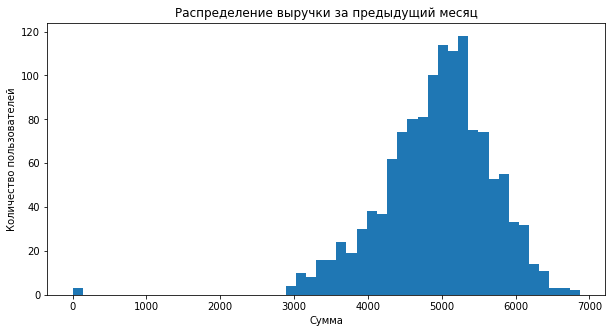

In [68]:
data_market_money_prepre_month_plot = data_market_money['выручка за предыдущий месяц'].plot(kind='hist', 
                                                                                               bins=50,
                                                                                               figsize=(10, 5))

data_market_money_prepre_month_plot.set_title('Распределение выручки за предыдущий месяц')
data_market_money_prepre_month_plot.set_xlabel('Сумма')
data_market_money_prepre_month_plot.set_ylabel('Количество пользователей')

plt.show()

#### Выручка за текущий месяц

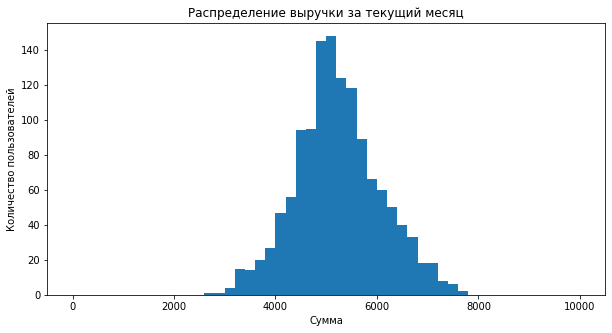

In [69]:
data_market_money_prepre_month_plot = data_market_money['выручка за текущий месяц'].plot(kind='hist', 
                                                                                               bins=50,
                                                                                               range=(0, 10000),
                                                                                               figsize=(10, 5))

data_market_money_prepre_month_plot.set_title('Распределение выручки за текущий месяц')
data_market_money_prepre_month_plot.set_xlabel('Сумма')
data_market_money_prepre_month_plot.set_ylabel('Количество пользователей')

plt.show()

#### Поиск и устранение выбросов и иных проблем

В данных виден выброс - кто-то потратил более 100 тысяч... Посмотрим, что это такое:

In [70]:
outliers = data_market_money[data_market_money['выручка за текущий месяц'] > 20000]['id'].tolist()

Более 20000 нашему клиенту принес только один покупатель. Можем ли мы считать это выбросом? Скорее да, чем нет. Такое значение всего одно, и только в одном месяце. Чтобы в дальнейшем не было проблем с обучением моделей, удалим его из всех датасетов.

In [71]:
for df in [data_market_file, data_market_money, data_market_time, data_money]:
    df.drop(df[df['id'].isin(outliers)].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [72]:
data_market_money[data_market_money['выручка за текущий месяц'] > 20000]['id'].tolist()

[]

In [73]:
data_market_money = data_market_money[(data_market_money['выручка за предыдущий месяц'] != 0) &
                                      (data_market_money['выручка за препредыдущий месяц'] != 0) &
                                      (data_market_money['выручка за текущий месяц'] != 0)]

data_market_file = data_market_file[data_market_file['id'].isin(data_market_money['id'])]
data_market_time = data_market_time[data_market_time['id'].isin(data_market_money['id'])]
data_money = data_money[data_money['id'].isin(data_market_money['id'])]

In [74]:
len(data_market_money)

1296

### EDA датасета data_market_time

#### Сколько минут проведено на сайте за указанный период

In [75]:
data_market_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 2 to 2597
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2592 non-null   int64 
 1   период  2592 non-null   object
 2   минут   2592 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.0+ KB


In [76]:
data_market_time['минут'].describe()

count   2592.000
mean      13.341
std        4.083
min        4.000
25%       10.000
50%       13.000
75%       16.000
max       23.000
Name: минут, dtype: float64

In [77]:
data_market_time_pivot = data_market_time.pivot_table(index='id', columns='период', values='минут', fill_value=0)

data_market_time_pivot.reset_index(inplace=True)

data_market_time_pivot.columns.name = None 
data_market_time_pivot.rename(columns={
    'текущий_месяц': 'минут за текущий месяц',
    'предыдущий_месяц': 'минут за предыдущий месяц'
}, inplace=True)

data_market_time = data_market_time_pivot

data_market_time.head()

id  минут за предыдущий месяц  минут за текущий месяц
0  215349                         12                      10
1  215350                          8                      13
2  215351                         11                      13
3  215352                          8                      11
4  215353                         10                      10

#### Количество минут за предыдущий месяц

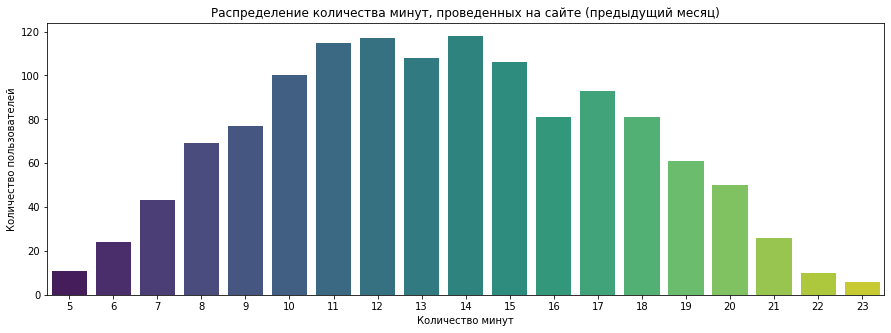

In [78]:
data_market_time_pivot_table = data_market_time.pivot_table(index='id', values='минут за предыдущий месяц', aggfunc='mean')

plt.figure(figsize=(15, 5))
sns.countplot(x='минут за предыдущий месяц', data=data_market_time_pivot_table, palette='viridis')
    
plt.title('Распределение количества минут, проведенных на сайте (предыдущий месяц)')
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')
    
plt.show()

#### Количество минут за текущий месяц

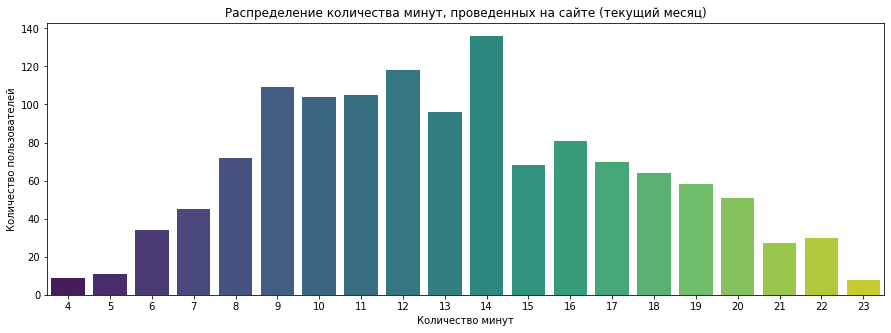

In [79]:
data_market_time_pivot_table = data_market_time.pivot_table(index='id', values='минут за текущий месяц', aggfunc='mean')

plt.figure(figsize=(15, 5))
sns.countplot(x='минут за текущий месяц', data=data_market_time_pivot_table, palette='viridis')
    
plt.title('Распределение количества минут, проведенных на сайте (текущий месяц)')
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')
    
plt.show()

За последние два месяца пользователи потратили в средем от 5 до 22 минут на сайте. 

### EDA датасета data_money

In [80]:
data_money.head()

id  прибыль
1  215349 4160.000
2  215350 3130.000
3  215351 4870.000
4  215352 4210.000
5  215353 3950.000

#### Анализ прибыли

In [81]:
data_money['прибыль'].describe()

count   1296.000
mean    3997.701
std     1011.198
min      860.000
25%     3300.000
50%     4045.000
75%     4670.000
max     7430.000
Name: прибыль, dtype: float64

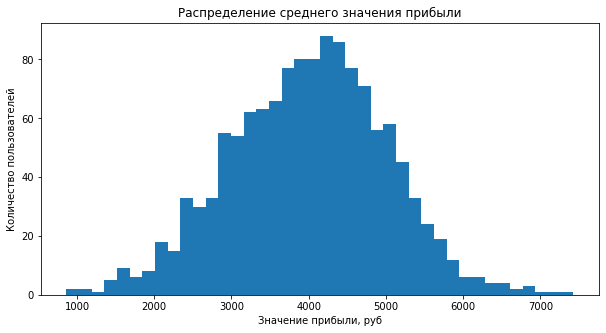

In [82]:
data_money_plot = data_money['прибыль'].plot(kind='hist', bins=40, figsize=(10, 5))

data_money_plot.set_title('Распределение среднего значения прибыли')
data_money_plot.set_xlabel('Значение прибыли, руб')
data_money_plot.set_ylabel('Количество пользователей')

plt.show()

В среднем, пользователи тратят около 4-х тысяч за месяц (исходя из данных за последние три). Распределение очень отдаленно напоминает нормальное.

### Промежуточный вывод

На данном шаге были проанализированы все признаки из всех имеющихся датасетов. Создано множество сводных таблиц, построены графики. Помимо изучения того, как распределены данные, также были выявлены выбросы в данных. Подобные проблемы устранены, датасеты подготовлены к дальнешим действиям.

## Объединение таблиц

### Объединение таблиц

In [83]:
data_market_file.shape

(1296, 13)

In [84]:
data_market_money.shape

(1296, 4)

In [85]:
data_market_time.shape

(1296, 3)

Теперь таблицы готовы к объединению - в каждой по 1299 наблюдений. Объединять будем по ключу `id`, так как он есть во всех датасетах.

In [86]:
data_market = data_market_file.merge(data_market_money, on='id', how='outer').merge(data_market_time, on='id', how='outer')

data_market.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес маркет_актив_тек_мес  длительность акционные_покупки  \
0               4.400              средний           819           высокая   
1               4.900               низкий           539            низкая   
2               3.200              высокий           896           высокая   
3               5.100               низкий          1064           высокая   
4               3.300              средний           762            низкая   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка за предыдущий месяц  выручка за препредыдущий месяц  \
0                     5216.000                            4472   
1                     5457.500                            4826   
2                     6158.000                            4793   
3                     5807.500                            4594   
4                     4738.500                            5124   

   выручка за текущий месяц  минут за предыдущий месяц  минут за текущий месяц  
0                  4971.600                         12                      10  
1                  5058.400                          8                      13  
2                  6610.400                         11                      13  
3                  5872.500                          8                      11  
4                  5388.500                         10                      10

Взглянем на размер получившейся таблицы:

In [87]:
data_market.shape

(1296, 18)

Данные не потерялись - их ровно столько, сколько и должно было быть. Столбцы тоже все на месте - 13 + 3 (без id) + 2 (без id) = 18. Приступим к дальнейшему анализу!

### Промежуточный вывод

На данном шаге таблицы с выручкой и временем были приведены в подобающий вид - теперь в них не дублируются id, а выручка и минуты находятся в разных столбцах в зависимости от месяца. 

## Корреляционный анализ

### Матрица корреляций

In [88]:
corr_matrix = data_market.drop('id', axis=1).phik_matrix(interval_cols= ['маркет_актив_6_мес', 'длительность', 
                                                                         'выручка за предыдущий месяц', 
                                                                         'выручка за препредыдущий месяц', 
                                                                         'выручка за текущий месяц', 
                                                                         'минут за предыдущий месяц', 
                                                                         'минут за текущий месяц'])

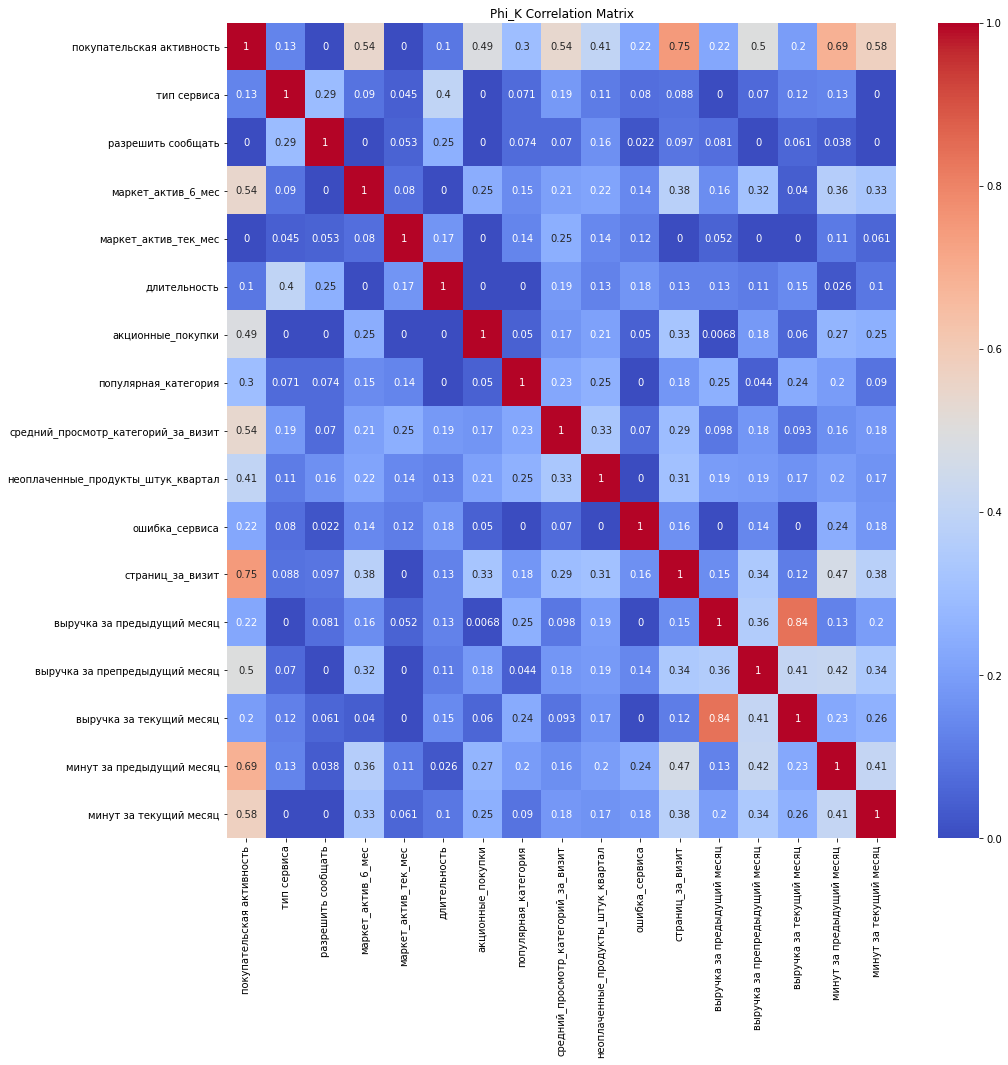

In [89]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

### Диаграммы рассеяния

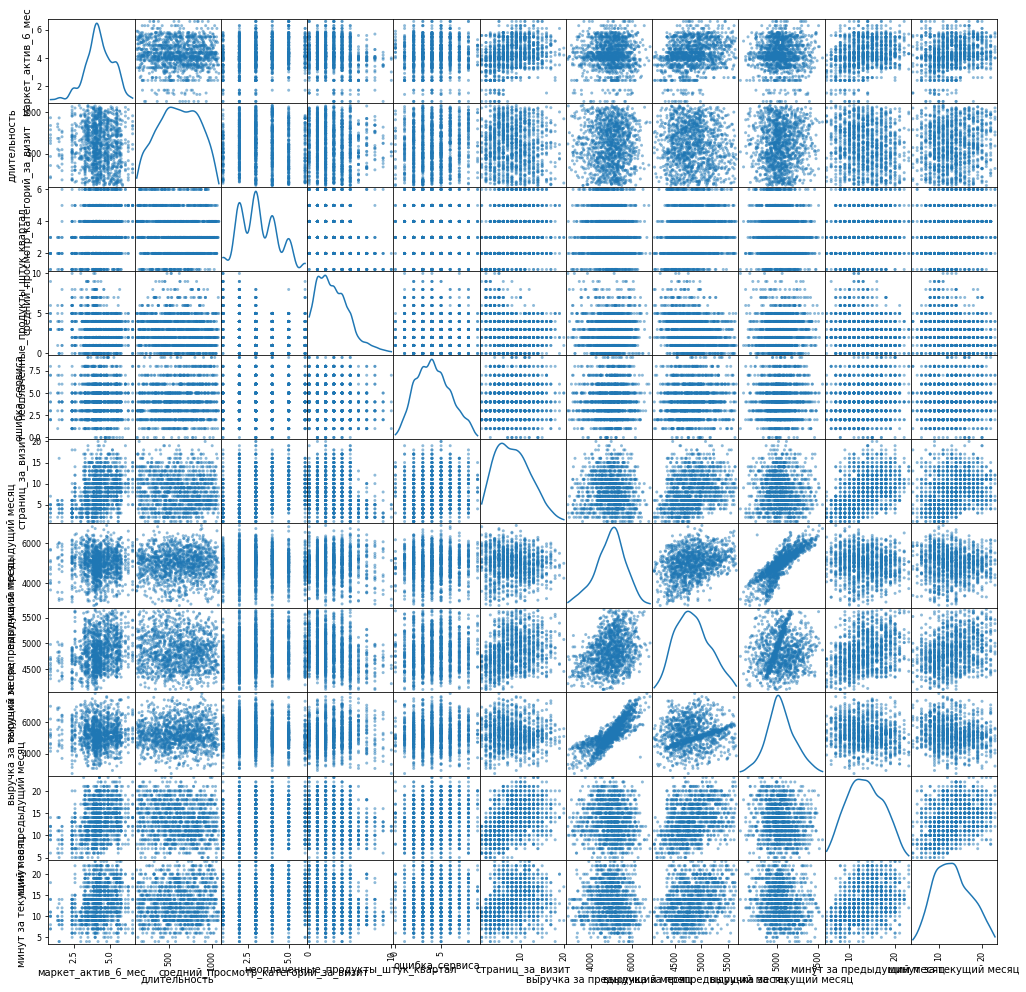

In [90]:
scatter_plot_market = pd.plotting.scatter_matrix(data_market.drop(columns=['id']), figsize=(17, 17), 
                                                 alpha=0.5, diagonal='kde')
    
plt.show()

### Устранение нелинейных зависимостей

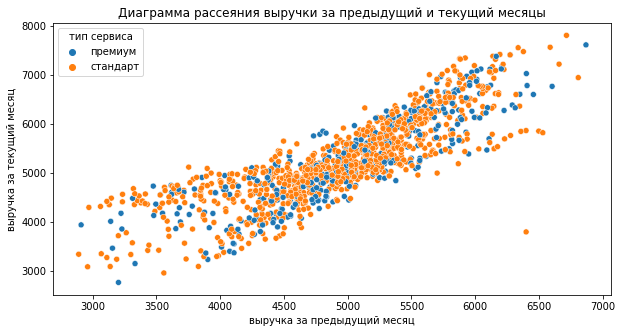

In [91]:
plt.figure(figsize=(10, 5))

milk_yield_scatter_plot = sns.scatterplot(x='выручка за предыдущий месяц', 
                                         y='выручка за текущий месяц', 
                                         hue='тип сервиса', 
                                         data=data_market, 
                                         legend='brief')

milk_yield_scatter_plot.set_title('Диаграмма рассеяния выручки за предыдущий и текущий месяцы')

plt.show()

In [92]:
data_market['квадрат выручки за предыдущий месяц'] = data_market['выручка за предыдущий месяц'] ** 2

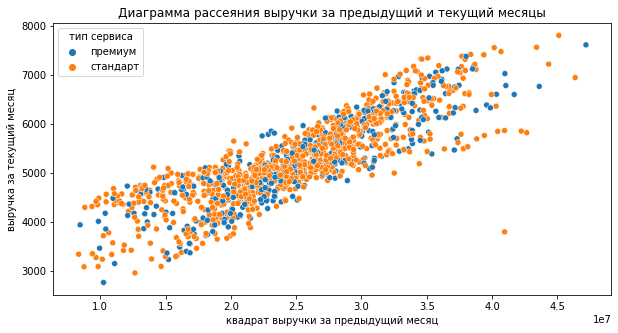

In [93]:
plt.figure(figsize=(10, 5))

milk_yield_scatter_plot = sns.scatterplot(x='квадрат выручки за предыдущий месяц', 
                                         y='выручка за текущий месяц', 
                                         hue='тип сервиса', 
                                         data=data_market, 
                                         legend='brief')

milk_yield_scatter_plot.set_title('Диаграмма рассеяния выручки за предыдущий и текущий месяцы')

plt.show()

### Обновленная матрица корреляций

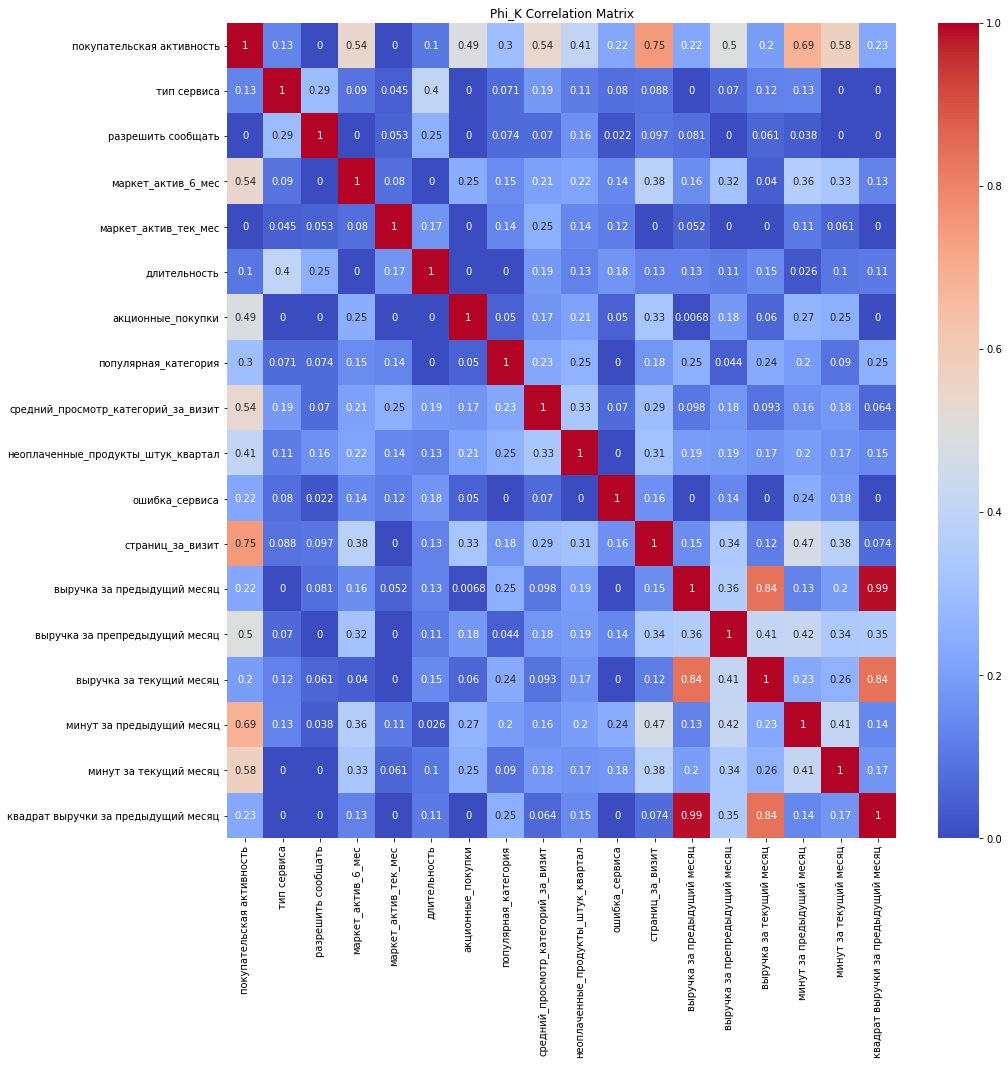

In [94]:
corr_matrix = data_market.drop('id', axis=1).phik_matrix(interval_cols= ['маркет_актив_6_мес', 'длительность', 
                                                                         'выручка за предыдущий месяц', 
                                                                         'выручка за препредыдущий месяц', 
                                                                         'выручка за текущий месяц', 
                                                                         'минут за предыдущий месяц', 
                                                                         'минут за текущий месяц', 
                                                                         'квадрат выручки за предыдущий месяц'])

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

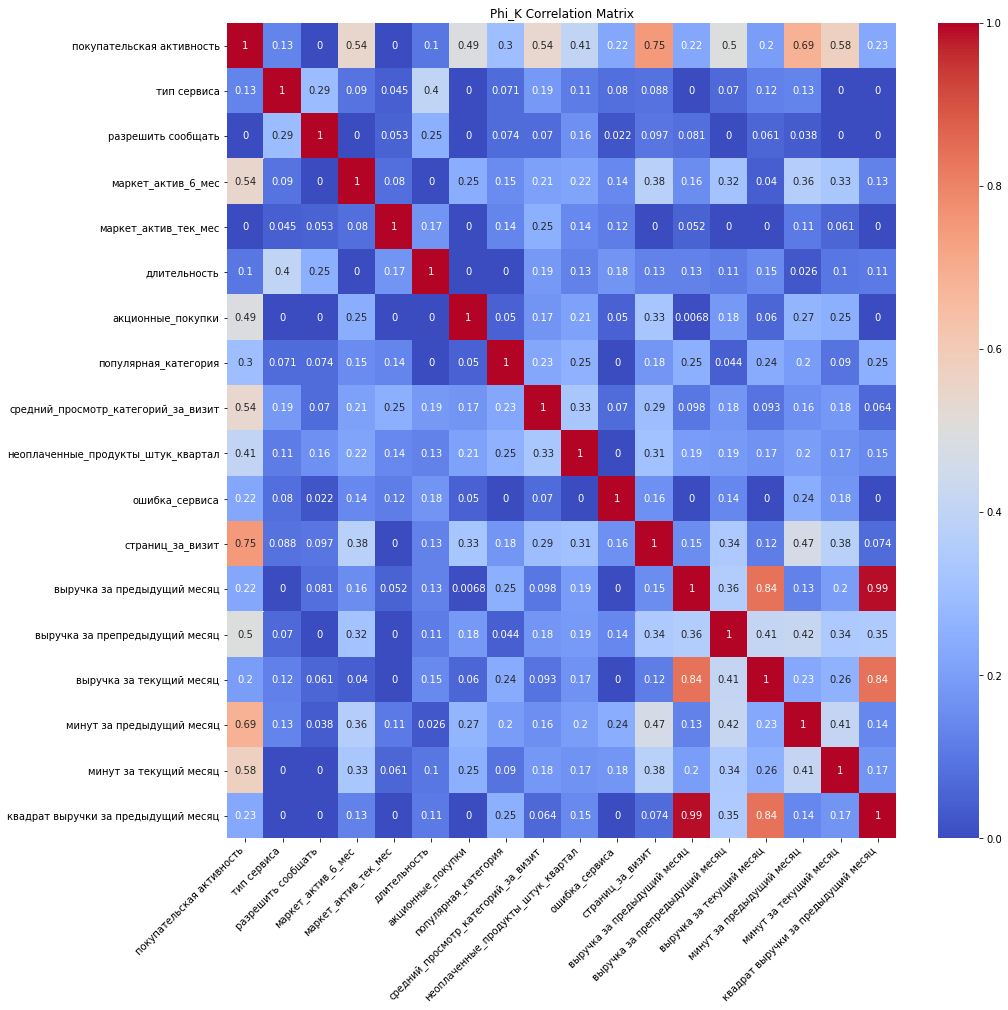

In [95]:
corr_matrix = data_market.drop('id', axis=1).phik_matrix(interval_cols= ['маркет_актив_6_мес', 'длительность', 
                                                                         'выручка за предыдущий месяц', 
                                                                         'выручка за препредыдущий месяц', 
                                                                         'выручка за текущий месяц', 
                                                                         'минут за предыдущий месяц', 
                                                                         'минут за текущий месяц', 
                                                                         'квадрат выручки за предыдущий месяц'])

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.index)
plt.xticks(rotation=45, ha='right')  # Поворот названий на 45 градусов
plt.yticks(rotation=0)             # Оставить названия по оси Y вертикальными
plt.title('Phi_K Correlation Matrix')
plt.show()

Удалим из датасета оригинальный признак с выручкой за предыдущий месяц, чтобы устранить мультиколлинеарность. У остальных признаков не наблюдается очень высокой корреляции (более 0.9), а значит мультиколлинеарности тоже нет.

In [95]:
#data_market = data_market.drop('выручка за предыдущий месяц', axis=1)

### Промежуточный вывод

На данном этапе исследования были проверены зависимости признаков друг от друга, найдены и устранены нелинейные зависимости. Введен новый признак - квадрат выручки за предыдущий месяц.

## Использование пайплайнов

Взглянем еще раз на датасет:

In [96]:
data_market.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес маркет_актив_тек_мес  длительность акционные_покупки  \
0               4.400              средний           819           высокая   
1               4.900               низкий           539            низкая   
2               3.200              высокий           896           высокая   
3               5.100               низкий          1064           высокая   
4               3.300              средний           762            низкая   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка за предыдущий месяц  выручка за препредыдущий месяц  \
0                     5216.000                            4472   
1                     5457.500                            4826   
2                     6158.000                            4793   
3                     5807.500                            4594   
4                     4738.500                            5124   

   выручка за текущий месяц  минут за предыдущий месяц  \
0                  4971.600                         12   
1                  5058.400                          8   
2                  6610.400                         11   
3                  5872.500                          8   
4                  5388.500                         10   

   минут за текущий месяц  квадрат выручки за предыдущий месяц  
0                      10                         27206656.000  
1                      13                         29784306.250  
2                      13                         37920964.000  
3                      11                         33727056.250  
4                      10                         22453382.250

Отлично, все данные на месте! Приступим к подготовке данных и созданию пайплайна.

Разделим данные на датасет со всеми признаками, кроме целевого и на Series - но уже с целевым. Удалим некоторые признаки из выборок.

ID - не требуется для обучения
Покупательская активность - целевой признак
Минуты и квадрат выручки - не требуются для обучения, так как никак не влияют на предсказания.

In [97]:
cols_to_delete = ['id', 'покупательская активность', 'минут за текущий месяц', 'квадрат выручки за предыдущий месяц']

In [98]:
X = data_market.drop(cols_to_delete, axis=1)
y = data_market['покупательская активность']

Разделим данные на тренировочную и тестовую выборки:

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE, 
                                                    stratify=y)


### Создание пайплайна

In [100]:
label = LabelEncoder()
label.fit(['Снизилась', 'Прежний уровень'])

y_train = label.transform(y_train)
y_test = label.transform(y_test)

Выберем признаки и распределим их по соответствующим наборам:

In [101]:
ohe_columns = ['популярная_категория']

ord_columns = ['тип сервиса', 'разрешить сообщать', 'маркет_актив_тек_мес', 'акционные_покупки']

In [102]:
num_columns = ['маркет_актив_6_мес', 'длительность', 
               'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
               'ошибка_сервиса', 'страниц_за_визит', 
               'выручка за препредыдущий месяц', 'минут за предыдущий месяц']

Начнем создавать пайплайн. Создадим первый фрагмент, в котором закодируем категориальные признаки:

In [103]:
ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
)

Во втором фрагмете закодируем порядковые категориальные признаки при помощи `OrdinalEncoder`:

In [104]:
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[
            ['стандарт', 'премиум'],
            ['да', 'нет'],
            ['высокий', 'средний', 'низкий'],
            ['низкая', 'высокая', 'средняя']
        ],
        handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Соберем фрагменты в препроцессор, который далее передадим в финальный пайплайн.

In [105]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

Создадим финальный пайплайн, и передадим ему набор моделей машинного обучения:

In [106]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', VotingClassifier(
        estimators=[
            ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE)),
            ('knn', KNeighborsClassifier()),
            ('lr', LogisticRegression(random_state=RANDOM_STATE)),
            ('svc', SVC(random_state=RANDOM_STATE, probability=True))
        ],
        voting='soft'
    ))
])

Создадим список для перебора параметров для каждой модели. В словарях лежат названия параметров в качестве ключей, и модели и их гиперпараметры соотвественно.

### Подбор моделей и параметров к ним

In [107]:
param_grid = [
    {
        'models' : [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth' : range(2, 10),
        'models__max_features' : range(2, 10),
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    
    {
        'models' : [KNeighborsClassifier()],
        'models__n_neighbors' : range(2, 30),
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    
    {
        'models' : [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l2')],
        'models__C' : range(1, 10),
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    
    {
        'models' : [SVC(random_state=RANDOM_STATE)],
        'models__C' : range(1, 10),
        'models__gamma' : ['scale', 'auto'],
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

Создадим экземпляр класса случайного перебора для подбора гиперпараметров идеальной модели.
В данном случае выбрана метрика `roc-auc`, так как перед нами стоит задача бинарной классификации: у целевого признака только два возможных значения, и нам нужно предсказать вероятность принадлежности к тому, или иному классу.

In [108]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

Испробуем пайплайн в действии:

In [109]:
randomized_search.fit(X_train, y_train)


/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ord',
                                                                                                OrdinalEncoder(categories=[['стандарт',
                                                                                                                            'пр...
                                        {'models': [LogisticRegression(random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__C': range(1, 10),
                                         'models__gamma': ['scale', 'auto'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

Если прислушиваться к нашему случайному перебору, то лучше всех справилась модель дерева решений.

In [110]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум'],
                                                                                              ['да',
                                                                                               'нет'],
                                                                                              ['высокий',
                                                                                               'с...
                                                   'маркет_актив_тек_мес',
                                                   'акционные_покупки']),
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'длительность',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка за препредыдущий '
                                                   'месяц',
                                                   'минут за предыдущий '
                                                   'месяц'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=5, max_features=6,
                                        random_state=42))])

Взглянем на подобранные параметры:

In [111]:
randomized_search.best_params_

{'preprocessor__num': MinMaxScaler(),
 'models__max_features': 6,
 'models__max_depth': 5,
 'models': DecisionTreeClassifier(random_state=42)}

И на метрику полученной модели:

In [112]:
randomized_search.best_score_

0.8294825850644033

Метрика очень высокая - чуть менее 20% предсказано неправильно. 

### Проверка модели на тестовых данных

#### Тестовые данные

Проверим качество модели на тренировочных данных:

In [113]:
preds = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, preds)

roc_auc

0.8484811713788779

Результат практически такой же, как и на тренировочных данных (но немного ниже). Модель работает хорошо.

#### Проверка на адекватность

In [114]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

preds_dc = dummy_clf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, preds_dc)

roc_auc

0.5

С полной уверенностью можно утверждать, что модель является адекватной, т.е. не случайно предсказывает, а делает выводы на основе каких-то зависимостей в данных.

In [115]:
best_model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

In [116]:
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
else:
    importance = best_model.coef_[0]

feature = preprocessor.get_feature_names_out()

In [117]:
feature_importance = pd.DataFrame(
    {
        'Feature' : feature,
        'Importance' : importance
    })

feature_importance.sort_values(by='Importance', ascending=False)

Feature  Importance
14                              num__страниц_за_визит       0.325
11           num__средний_просмотр_категорий_за_визит       0.219
16                     num__минут за предыдущий месяц       0.152
15                num__выручка за препредыдущий месяц       0.121
8                              ord__акционные_покупки       0.073
9                             num__маркет_актив_6_мес       0.037
10                                  num__длительность       0.034
2   ohe__популярная_категория_Мелкая бытовая техни...       0.014
12            num__неоплаченные_продукты_штук_квартал       0.010
17             remainder__выручка за предыдущий месяц       0.007
13                                num__ошибка_сервиса       0.006
18                remainder__выручка за текущий месяц       0.003
1           ohe__популярная_категория_Кухонная посуда       0.000
7                           ord__маркет_актив_тек_мес       0.000
6                             ord__разрешить сообщать       0.000
5                                    ord__тип сервиса       0.000
4          ohe__популярная_категория_Товары для детей       0.000
3   ohe__популярная_категория_Техника для красоты ...       0.000
0     ohe__популярная_категория_Косметика и аксесуары       0.000

## Анализ важности признаков

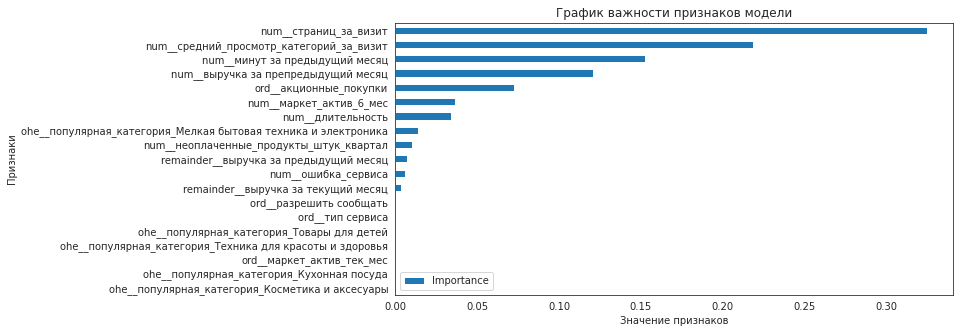

In [118]:
feature_importance = pd.DataFrame({'Feature' : feature,'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 5))

plt.title('График важности признаков модели')
plt.xlabel('Значение признаков')
plt.ylabel('Признаки')

plt.show()

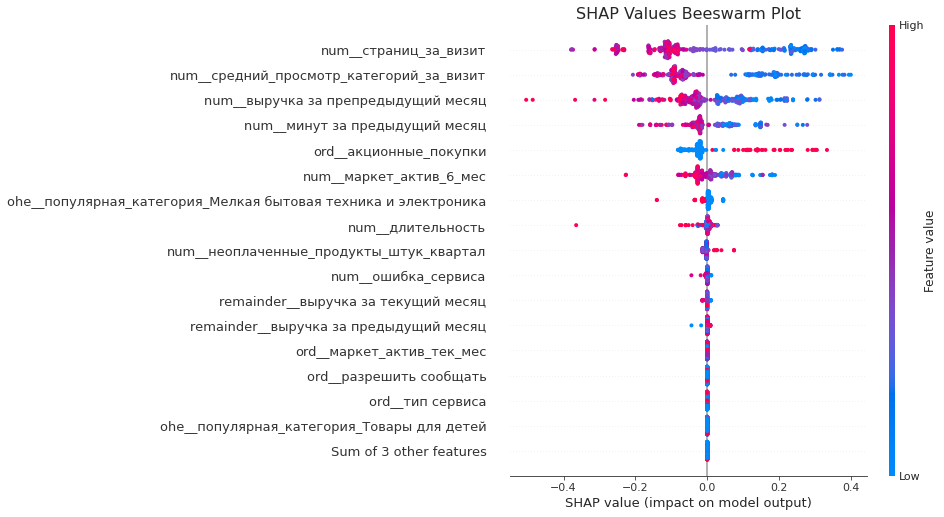

In [119]:
X_test_new = preprocessor.transform(X_test)

explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X_test_new)[:, :, 1]

X_test_df = pd.DataFrame(X_test_new, columns=feature)

shap_values_explanation = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test_df 
)

plt.title('SHAP Values Beeswarm Plot', fontsize=16)
shap.plots.beeswarm(shap_values_explanation, max_display=17)

plt.show()

Как мы можем увидеть, больше всего на решение модели о том, какое решение принять, влияет количество минут, проведененное на сайте. И действительно - чем дольше пользователь провел времени на сайте, тем больше действий он может сделать.

Следом идет среднее число просмотренных категорий - тоже достаточно важный для модели показатель. Тоже все верно - чем больше категорий просмотрел пользователь, тем больше его активность на сайте. Далее мы видим активность компании за 6 месяцев, кол-во страниц за визит и акционные покупки. Именно эти признаки на 90% определяют решение модели.

Оставшиеся признаки имеют малую значимость по сравнению с остальными.

### Какие выводы для бизнеса?

Бизнес должен максимизировать количество просмотренных пользователем категорий и время на сайте. Как можно это сделать? В первую очередь, рекомендательная система на основе предпочтений пользователя (все уже что-то заказывали, а значит примерная информация есть).Вместе с этим, вероятно, повысится и количество страниц за визит. 

## Сегментация покупателей

In [120]:
preds = randomized_search.best_estimator_.predict(X_test)
X_test['Предсказанная активность'] = preds

In [121]:
X_test.head()

тип сервиса разрешить сообщать  маркет_актив_6_мес маркет_актив_тек_мес  \
809    стандарт                 да               4.100              средний   
302     премиум                нет               1.400              средний   
955     премиум                 да               3.300              средний   
149     премиум                 да               3.500               низкий   
582    стандарт                нет               5.500              средний   

     длительность акционные_покупки                  популярная_категория  \
809           606            низкая        Техника для красоты и здоровья   
302           684           высокая                      Товары для детей   
955           488            низкая                     Домашний текстиль   
149          1057            низкая                     Домашний текстиль   
582           147           высокая  Мелкая бытовая техника и электроника   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
809                                    6                                   1   
302                                    3                                   6   
955                                    4                                   2   
149                                    4                                   3   
582                                    1                                   2   

     ошибка_сервиса  страниц_за_визит  выручка за предыдущий месяц  \
809               4                12                     3973.000   
302               1                 6                     3548.000   
955               8                10                     5444.000   
149               5                 6                     6604.000   
582               3                 7                     5090.000   

     выручка за препредыдущий месяц  выручка за текущий месяц  \
809                            4912                  3289.200   
302                            4656                  4170.700   
955                            4565                  6335.800   
149                            4993                  6758.700   
582                            4451                  5773.800   

     минут за предыдущий месяц  Предсказанная активность  
809                         16                         0  
302                         11                         1  
955                         20                         0  
149                          9                         0  
582                         15                         1

Для начала посмотрим, сколько принесла каждая категория пользователей за последние три месяца:

In [122]:
data_market['общая выручка'] = (data_market['выручка за препредыдущий месяц'] + 
                                data_market['выручка за предыдущий месяц'] + 
                                data_market['выручка за текущий месяц'])

data_market.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес маркет_актив_тек_мес  длительность акционные_покупки  \
0               4.400              средний           819           высокая   
1               4.900               низкий           539            низкая   
2               3.200              высокий           896           высокая   
3               5.100               низкий          1064           высокая   
4               3.300              средний           762            низкая   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка за предыдущий месяц  выручка за препредыдущий месяц  \
0                     5216.000                            4472   
1                     5457.500                            4826   
2                     6158.000                            4793   
3                     5807.500                            4594   
4                     4738.500                            5124   

   выручка за текущий месяц  минут за предыдущий месяц  \
0                  4971.600                         12   
1                  5058.400                          8   
2                  6610.400                         11   
3                  5872.500                          8   
4                  5388.500                         10   

   минут за текущий месяц  квадрат выручки за предыдущий месяц  общая выручка  
0                      10                         27206656.000      14659.600  
1                      13                         29784306.250      15341.900  
2                      13                         37920964.000      17561.400  
3                      11                         33727056.250      16274.000  
4                      10                         22453382.250      15251.000

In [123]:
data_market_stonks_pivot_table = data_market.pivot_table(index='популярная_категория', values='общая выручка', aggfunc='sum')
data_market_stonks_pivot_table.sort_values(by='общая выручка', ascending=True)

общая выручка
популярная_категория                               
Кухонная посуда                         2150586.800
Техника для красоты и здоровья          2635957.700
Мелкая бытовая техника и электроника    2644957.300
Косметика и аксесуары                   3411840.700
Домашний текстиль                       3826909.900
Товары для детей                        4797957.600

Меньше всего принесла кухонная посуда. Именно эту категорию пользователей мы и проанализируем.

In [124]:
dm_kitchen_utensils = data_market[data_market['популярная_категория'] == 'Кухонная посуда']

dm_kitchen_utensils.head()

id покупательская активность тип сервиса разрешить сообщать  \
9   215360                 Снизилась     премиум                 да   
40  215392                 Снизилась     премиум                 да   
53  215405                 Снизилась    стандарт                 да   
56  215408                 Снизилась     премиум                 да   
57  215409                 Снизилась     премиум                 да   

    маркет_актив_6_мес маркет_актив_тек_мес  длительность акционные_покупки  \
9                3.900               низкий           623            низкая   
40               3.900               низкий           525            низкая   
53               3.000               низкий           669            низкая   
56               2.400               низкий           666           высокая   
57               1.400              средний           857           высокая   

   популярная_категория  средний_просмотр_категорий_за_визит  \
9       Кухонная посуда                                    3   
40      Кухонная посуда                                    5   
53      Кухонная посуда                                    4   
56      Кухонная посуда                                    3   
57      Кухонная посуда                                    3   

    неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
9                                    1               4                 7   
40                                   0               4                 4   
53                                   2               5                 4   
56                                   5               1                 2   
57                                   4               5                 5   

    выручка за предыдущий месяц  выручка за препредыдущий месяц  \
9                      5304.500                            5555   
40                     4548.000                            4341   
53                     6226.500                            4881   
56                     5295.000                            4434   
57                     5219.500                            4465   

    выручка за текущий месяц  минут за предыдущий месяц  \
9                   5834.900                          9   
40                  5234.400                          7   
53                  7104.000                         12   
56                  5029.800                         10   
57                  5538.000                          6   

    минут за текущий месяц  квадрат выручки за предыдущий месяц  общая выручка  
9                        6                         28137720.250      16694.400  
40                       7                         20684304.000      14123.400  
53                       9                         38769302.250      18211.500  
56                      12                         28037025.000      14758.800  
57                      12                         27243180.250      15222.500

### Покупательская активность

Взглянем, что с покупательской активностью у пользователей, которые чаще всего покупают кухонную посуду.

In [125]:
dm_kitchen_utensils['покупательская активность'].value_counts()

Прежний уровень    72
Снизилась          66
Name: покупательская активность, dtype: int64

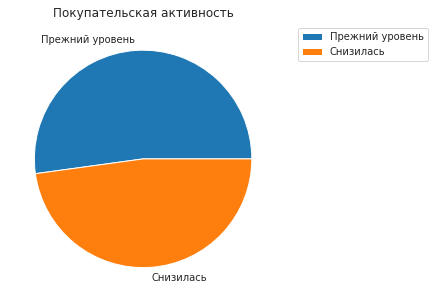

In [126]:
dm_kitchen_utensils_activity_plot = (dm_kitchen_utensils['покупательская активность'].value_counts().
                                             plot(kind='pie', figsize=(10, 5), subplots=True))

plt.title('Покупательская активность')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

Почти у половины пользователей активность снизилась, у остальных же - осталась на прежнем уровне. В сравнении с данными по всем категориям товаров, здесь снижение наблюдается у большего процента пользователей. Но сделать однозначный вывод о том, связано ли это с конкретной категорией нельзя, нужно анализировать все остальные сегменты.

### Тип сервиса

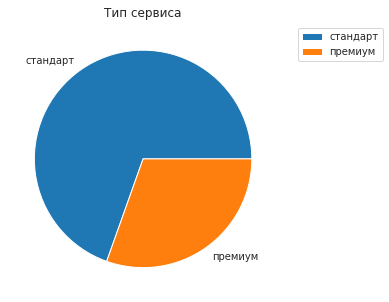

In [127]:
dm_kitchen_utensils_service_plot = (dm_kitchen_utensils['тип сервиса'].value_counts().
                                             plot(kind='pie', figsize=(10, 5), subplots=True))

plt.title('Тип сервиса')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

Тут явное преобладаение пользователей без подписки. С чем это может быть связано? Вероятно, товары из этой категории являются необходимыми для жизни, и их покупка не требует раздумий - пользователи с подпиской же явно могут позволить себе более тонкий подход.

### Разрешить сообщать

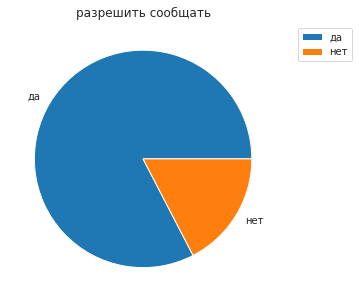

In [128]:
dm_kitchen_utensils_message_plot = (dm_kitchen_utensils['разрешить сообщать'].value_counts().
                                             plot(kind='pie', figsize=(10, 5), subplots=True))

plt.title('разрешить сообщать')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

Люди не против, чтобы компания с ними связывалась - с этим признаком, в целом, все в порядке.

### Активность за последние 6 месяцев

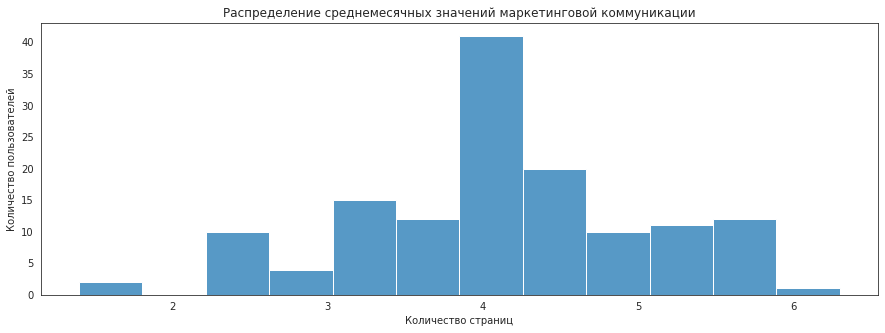

In [129]:
plt.figure(figsize=(15, 5))
sns.histplot(x='маркет_актив_6_мес', data=dm_kitchen_utensils)
    
plt.title('Распределение среднемесячных значений маркетинговой коммуникации')
plt.xlabel('Количество страниц')
plt.ylabel('Количество пользователей')
    
plt.show()

Это похоже на график, который был получен в процессе исследования исходного датасета. 

### Активность за текущий месяц

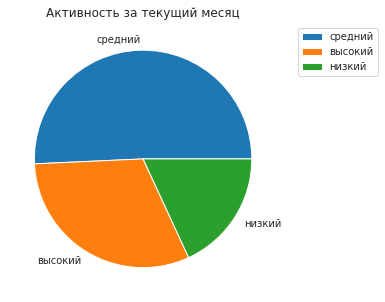

In [130]:
dm_kitchen_utensils_curr_plot = (dm_kitchen_utensils['маркет_актив_тек_мес']
                                              .value_counts()
                                              .plot(kind='pie', figsize=(10, 5)))

plt.title('Активность за текущий месяц')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

Преобладает средняя активность. Можно порекомендовать компании обратить внимание на пользователей с низким уровнем взаимодействия - эту категорию нужно минимизировать.

### Длительность

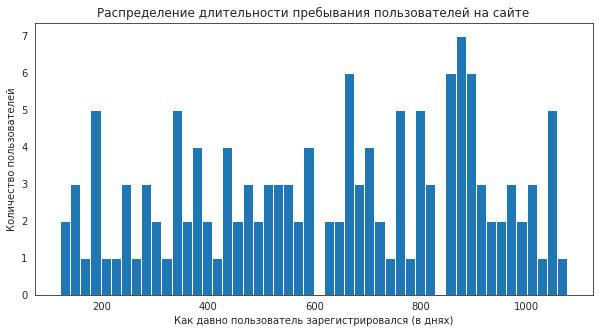

In [131]:
dm_kitchen_utensils_duration_plot = dm_kitchen_utensils['длительность'].plot(kind='hist', bins=50, figsize=(10, 5))

dm_kitchen_utensils_duration_plot.set_title('Распределение длительности пребывания пользователей на сайте')
dm_kitchen_utensils_duration_plot.set_xlabel('Как давно пользователь зарегистрировался (в днях)')
dm_kitchen_utensils_duration_plot.set_ylabel('Количество пользователей')

plt.show()

Данная выборка не очень велика, и какие-то выводы сделать трудно. 

### Акционные покупки

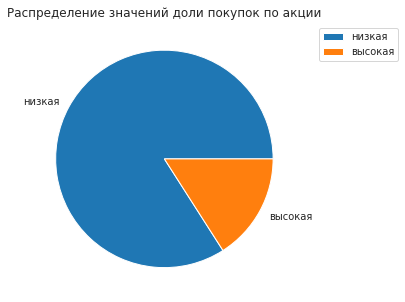

In [132]:
dm_kitchen_utensils_duration_plot = dm_kitchen_utensils['акционные_покупки'].value_counts().plot(kind='pie', figsize=(10, 5))

plt.title('Распределение значений доли покупок по акции')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left')

plt.show()

В основном в данной категории у пользователей низкий уровень доли покупок по акции (менее 50%).

### Средний количества просмотренных категорий за визит

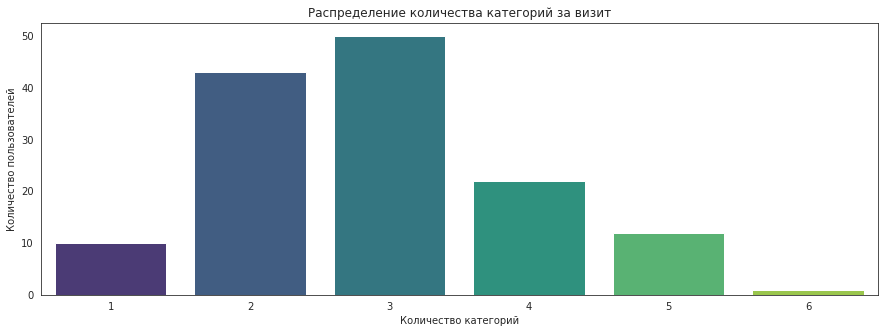

In [133]:
plt.figure(figsize=(15, 5))
sns.countplot(x='средний_просмотр_категорий_за_визит', data=dm_kitchen_utensils, palette='viridis')
    
plt.title('Распределение количества категорий за визит')
plt.xlabel('Количество категорий')
plt.ylabel('Количество пользователей')
    
plt.show()

Все так же, как и в исходном датасете - чаще всего пользователи смотрят 2-3 категории и выходят. При этом просели другие показатели - 4 и 5 категорий.

### Неоплаченные продукты в корзине

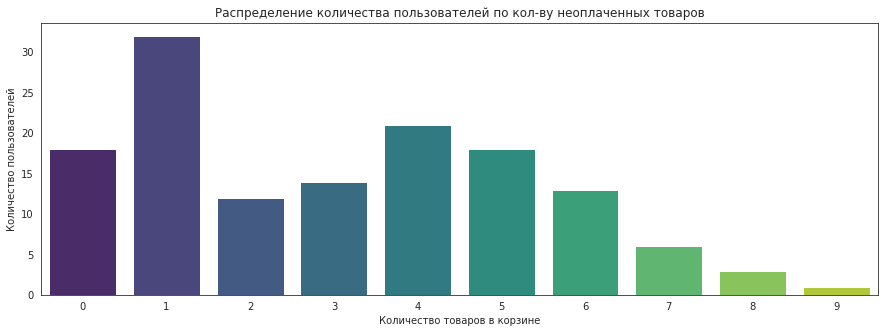

In [134]:
plt.figure(figsize=(15, 5))
sns.countplot(x='неоплаченные_продукты_штук_квартал', data=dm_kitchen_utensils, palette='viridis')
    
plt.title('Распределение количества пользователей по кол-ву неоплаченных товаров')
plt.xlabel('Количество товаров в корзине')
plt.ylabel('Количество пользователей')
    
plt.show()

Более, чем у 30 человек в корзине лежит один неоплаченный товар.

### Количество ошибок сервиса

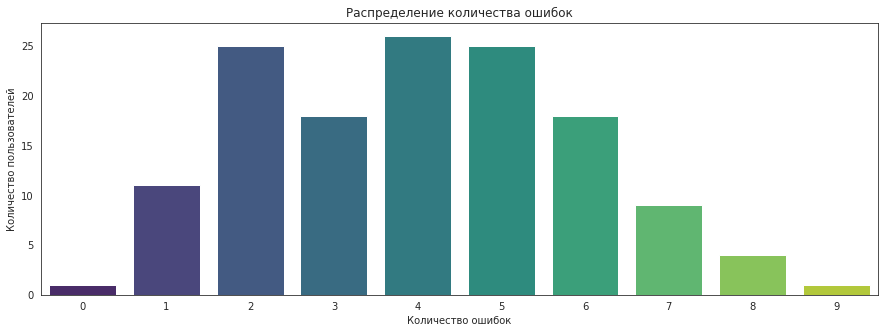

In [135]:
plt.figure(figsize=(15, 5))
sns.countplot(x='ошибка_сервиса', data=dm_kitchen_utensils, palette='viridis')
    
plt.title('Распределение количества ошибок')
plt.xlabel('Количество ошибок')
plt.ylabel('Количество пользователей')
    
plt.show()

Самые частые значения - 2, 4 и 5. Это достаточно сильно похоже на исходную выборку.

### Сколько страниц пользователь посетил за визит

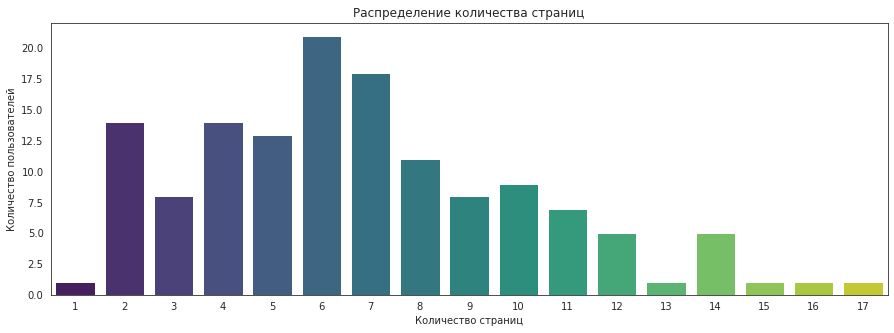

In [136]:
plt.figure(figsize=(15, 5))
sns.countplot(x='страниц_за_визит', data=dm_kitchen_utensils, palette='viridis')
    
plt.title('Распределение количества страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Количество пользователей')
    
plt.show()

Большая часть пользователей смотрит около 5-7 страниц за посещение. Наблюдения снова практически не отличаются от датасета `data_market_file`.

### Промежуточный вывод

На данном этапе исследования был более делально проанализирован сегмент пользователей, у которых наиболее популярной категорией товаров для покупки являлась кухонная посуда. 

Были построены графики и рассмотрены различные статистики. Дополнительное исследование показывает, что данная выборка достаточно точно передает параметры исходного датасета. Распределения признаков схожи (в основном) и исследуемого датасета и исходного.

Какие рекомендации можно дать бизнесу? \
На данный признак стоит обратить более пристальное внимание для увеличения получаемой прибыли. Возможно, стоит пересмотреть ассортимент товаров - если их слишком много, то уменьшить количество позиций и наоборот, если позиций мало, начать продават новые товары и пронаблюдать изменения. 

Также, как и в одном из предыдущих выводов, можно предложить заказчику улучшить свою рекомендательную систему.

## Итоговый вывод

- **Описание задачи** \
 Провести анализ данных от заказчика, и разработать решение, которое позволит персонализировать предложения постоянным клиентам.
 
- **Исходные данные и проведенная предобработка** \
 Исходные данные были представлены в трех датасетах. Пропусков в данных не выявлено, дубликатов также не обнаружено. Были найдены и устранены лексические проблемы - ошибки в значениях признаков (лишняя/неправильная буква). После предобработки данные были проанализированы - проведены исследовательский и корреляционный анализ данный. Найдены зависимости как внутри самих признаков, так и найдена корреляция между разными. Мультиколлинеарность в признаках не обнаружена.
 
- **Что было сделано для поиска лучшей модели** \
 Для поиска лучшей модели машинного обучения был создан и обучен пайплайн, в котором при помощи случайного перебора была подобрана лучшая модель (дерево решений), а также лучшие гиперпараметры для нее, при которых метрика 'roc-auc' оказалась достаточно высокой. Почему именно эта метрика? Решалась задача классификации, т.е. предсказывались вероятности.
 
- **Параметры лучшей модели** \
  Лучший скейлер - RobustScaler() \
  Подходящее число признаков: 5 \
  Подходящая "глубина": 4 \
  Лучшая модель: DecisionTreeClassifier()
  
- **Выводы**
 Что можно посоветовать заказчику? Опять же, рекомендательная система и внедрение других способов удержания пользователей на сайте. Также есть советы по поводу сбора данных - указывать данные о выручке и времени на сайте стоит не за этот и предыдущий месяцы, а, к примеру, среднее за все время.